In [2]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from collections import Counter
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV

%matplotlib inline

In [3]:
a, b, c = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
lst = [a, b, c]
del a, b, c # dfs still in list
del lst     # memory release now

In [4]:
data1=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\loanpred\train_ctrUa4K.csv")
data2=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\loanpred\test_lAUu6dG.csv")

IMPUTING VALUES

In [5]:
data1['Gender'].fillna(data1['Gender'].mode()[0], inplace=True)
data1['Married'].fillna(data1['Married'].mode()[0], inplace=True)
data1['Dependents'].fillna(data1['Dependents'].mode()[0], inplace=True)
data1['Self_Employed'].fillna(data1['Self_Employed'].mode()[0], inplace=True)
data1['Credit_History'].fillna(data1['Credit_History'].mode()[0], inplace=True)

data1['LoanAmount'].fillna(data1['LoanAmount'].median(), inplace=True)
data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].median(), inplace=True)

data1['Loan_Status']=data1['Loan_Status'].replace({'Y':1,'N':0}).astype(int)
data1['Self_Employed']=data1['Self_Employed'].replace({'Yes':1,'No':0}).astype(int)
data1['Property_Area']=data1['Property_Area'].replace({'Rural':0, 'Semiurban':1, 'Urban':2}).astype(int)
data1['Education']=data1['Education'].replace({'Graduate':1, 'Not Graduate':0}).astype(int)
# data1['Dependents']=data1['Dependents'].replace({'3+':3}).astype(int)
data1['Married']=data1['Married'].replace({'Yes':1, 'No':0}).astype(int)
data1['Credit_History']=data1['Credit_History'].astype(int)
data1['Gender']=data1['Gender'].replace({'Male':1, 'Female':0}).astype(int)

In [6]:
data2['Gender'].fillna(data2['Gender'].mode()[0], inplace=True)
data2['Married'].fillna(data2['Married'].mode()[0], inplace=True)
data2['Dependents'].fillna(data2['Dependents'].mode()[0], inplace=True)
data2['Self_Employed'].fillna(data2['Self_Employed'].mode()[0], inplace=True)
data2['Credit_History'].fillna(data2['Credit_History'].mode()[0], inplace=True)
data2['LoanAmount'].fillna(data2['LoanAmount'].median(), inplace=True)
data2['Loan_Amount_Term'].fillna(data2['Loan_Amount_Term'].median(), inplace=True)

# data2['Loan_Status']=data2['Loan_Status'].replace({'Y':1,'N':0}).astype(int)
data2['Self_Employed']=data2['Self_Employed'].replace({'Yes':1,'No':0}).astype(int)
data2['Property_Area']=data2['Property_Area'].replace({'Rural':0, 'Semiurban':1, 'Urban':2}).astype(int)
data2['Education']=data2['Education'].replace({'Graduate':1, 'Not Graduate':0}).astype(int)
# data2['Dependents']=data2['Dependents'].replace({'3+':3}).astype(int)
data2['Married']=data2['Married'].replace({'Yes':1, 'No':0}).astype(int)
data2['Credit_History']=data2['Credit_History'].astype(int)
data2['Gender']=data2['Gender'].replace({'Male':1, 'Female':0}).astype(int)

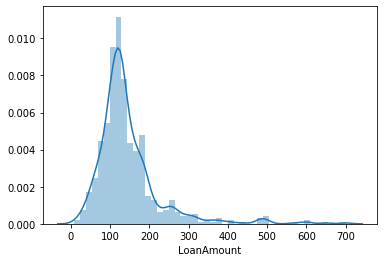

In [7]:
sns.distplot(data1["LoanAmount"])

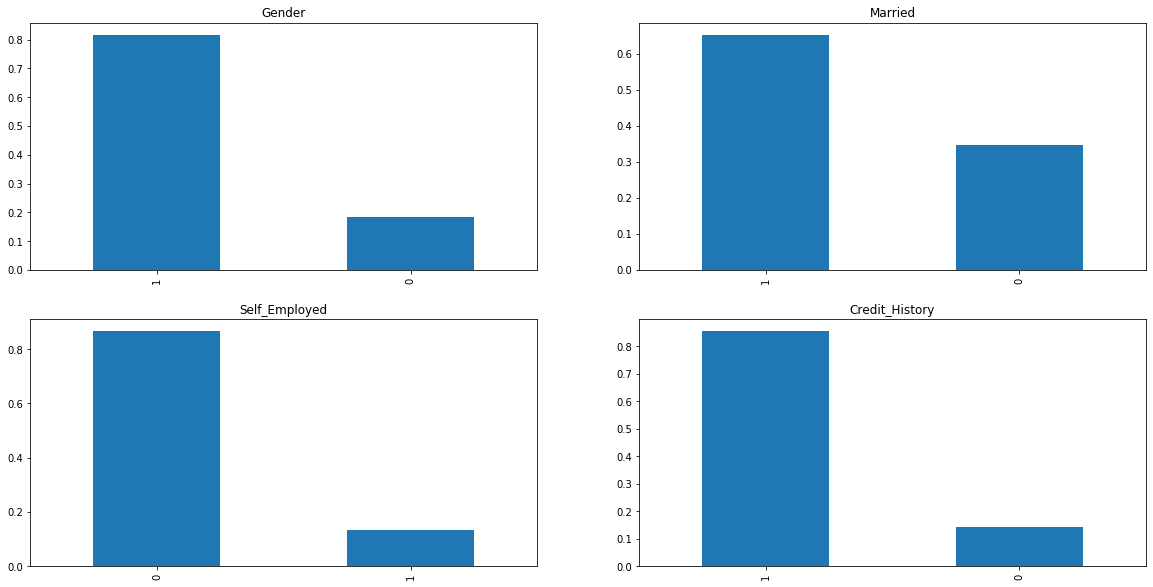

In [11]:
plt.figure(1)
plt.subplot(221) 
data1['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
data1['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
data1['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
data1['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

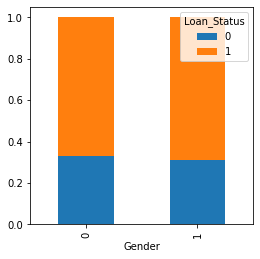

In [15]:
Gender=pd.crosstab( data1['Gender'], data1['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

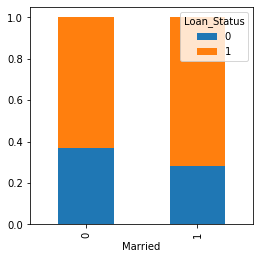

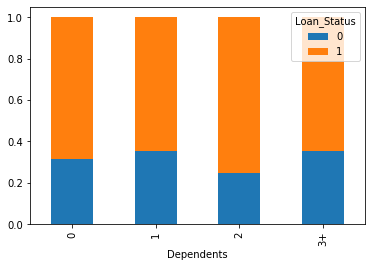

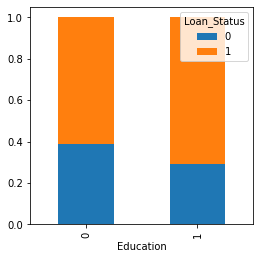

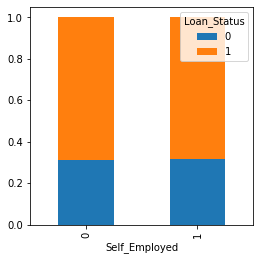

In [17]:
Married=pd.crosstab(data1['Married'],data1['Loan_Status']) 
Dependents=pd.crosstab(data1['Dependents'],data1['Loan_Status'])
Education=pd.crosstab(data1['Education'],data1['Loan_Status'])
Self_Employed=pd.crosstab(data1['Self_Employed'],data1['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

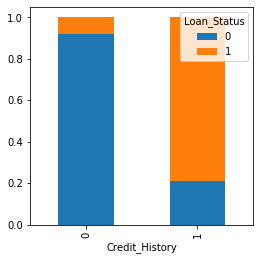

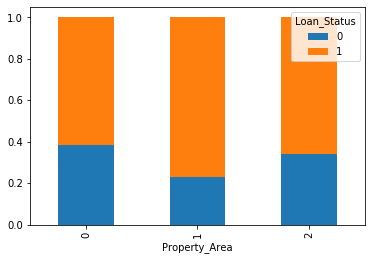

In [18]:
Credit_History=pd.crosstab(data1['Credit_History'],data1['Loan_Status'])
Property_Area=pd.crosstab(data1['Property_Area'],data1['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

Text(0.5, 1, 'Correlation between features')

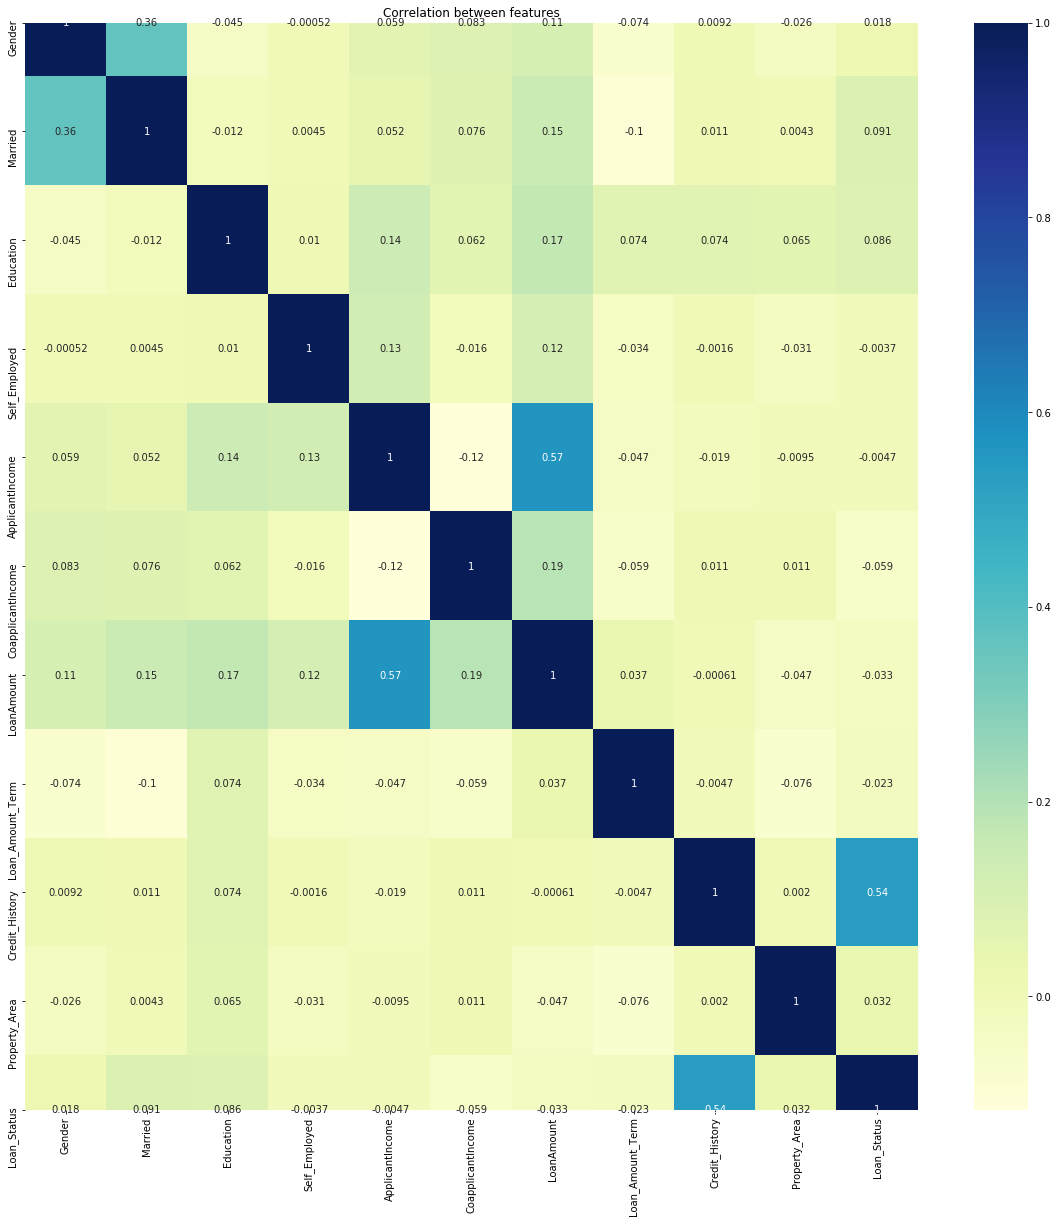

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data1.corr(), annot=True, cmap="YlGnBu").set_title("Correlation between features")

Feature Engineering:
        

In [272]:

def Dependents():
    global data1
    data1['Single'] = data1['Dependents'].map(lambda d: 1 if d=='1' else 0)
    data1['Small_Family'] = data1['Dependents'].map(lambda d: 1 if d=='2' else 0)
    data1['Large_Family'] = data1['Dependents'].map(lambda d: 1 if d=='3' else 0)
    data1.drop(['Dependents'], axis=1, inplace=True)
    global data2
    data2['Single'] = data2['Dependents'].map(lambda d: 1 if d=='1' else 0)
    data2['Small_Family'] = data2['Dependents'].map(lambda d: 1 if d=='2' else 0)
    data2['Large_Family'] = data2['Dependents'].map(lambda d: 1 if d=='3' else 0)
    data2.drop(['Dependents'], axis=1, inplace=True)

In [273]:
Dependents()

In [274]:
data1["Total_income"]=data1["ApplicantIncome"]+data1["CoapplicantIncome"]
data2["Total_income"]=data2["ApplicantIncome"]+data2["CoapplicantIncome"]

In [275]:
def rounding():
    global data1
    round(data1['ApplicantIncome'], 2)
    round(data1['CoapplicantIncome'],2)
    global data2
    round(data2['ApplicantIncome'], 2)
    round(data2['CoapplicantIncome'],2)
#     round(data1['LoanAmount'], 2)
#     round(data1["Total_income"],2)

In [276]:
rounding()

In [277]:
data1["DTI"]=(data1["LoanAmount"]/data1["Total_income"])
data2["DTI"]=(data2["LoanAmount"]/data2["Total_income"])
data1['DTI']=round(data1['DTI'] ,3)
data1['dti%']=data1['DTI']*100
data2['DTI']=round(data2['DTI'] ,3)
data2['dti%']=data2['DTI']*100

In [278]:
def EDA():
    global data1
    data1['EAD']=(data1['Credit_History']==0) & (data1['DTI']>=data1['DTI'].mean())
    data1['EAD'].replace({True:1, False: 0}, inplace=True)
    global data2
    data2['EAD']=(data2['Credit_History']==0) & (data2['DTI']>=data2['DTI'].mean())
    data2['EAD'].replace({True:1, False: 0}, inplace=True)
#     data1.drop([ 'EDA'],axis=1, inplace=True)

In [279]:
EDA()

In [280]:
data1.head(10)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Single,Small_Family,Large_Family,Total_income,DTI,dti%,EAD
0,LP001002,1,0,1,0,5849,0.0,128.0,360.0,1,2,1,0,0,0,5849.0,0.022,2.2,0
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0,1,0,0,6091.0,0.021,2.1,0
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1,2,1,0,0,0,3000.0,0.022,2.2,0
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1,2,1,0,0,0,4941.0,0.024,2.4,0
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1,2,1,0,0,0,6000.0,0.024,2.4,0
5,LP001011,1,1,1,1,5417,4196.0,267.0,360.0,1,2,1,0,1,0,9613.0,0.028,2.8,0
6,LP001013,1,1,0,0,2333,1516.0,95.0,360.0,1,2,1,0,0,0,3849.0,0.025,2.5,0
7,LP001014,1,1,1,0,3036,2504.0,158.0,360.0,0,1,0,0,0,0,5540.0,0.029,2.9,1
8,LP001018,1,1,1,0,4006,1526.0,168.0,360.0,1,2,1,0,1,0,5532.0,0.030,3.0,0
9,LP001020,1,1,1,0,12841,10968.0,349.0,360.0,1,1,0,1,0,0,23809.0,0.015,1.5,0


In [281]:
data1.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area          int32
Loan_Status            int32
Single                 int64
Small_Family           int64
Large_Family           int64
Total_income         float64
DTI                  float64
dti%                 float64
EAD                    int64
dtype: object

In [282]:


x = data1.drop(columns=['Loan_Status','Loan_ID'],axis=1) 
x_fit=pd.get_dummies(x)
y_fit= data1.Loan_Status
data2=data2.drop(['Loan_ID'], axis=1)
data2=pd.get_dummies(data2)
# os=RandomOverSampler(ratio=0.5)
# x_fit, y_fit=os.fit_sample(x,y)
# print(x_fit.shape, y_fit.shape)

In [283]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_fit)))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 422, 0: 192})


In [284]:
x_fit.astype(int)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Single,Small_Family,Large_Family,Total_income,DTI,dti%,EAD
0,1,0,1,0,5849,0,128,360,1,2,0,0,0,5849,0,2,0
1,1,1,1,0,4583,1508,128,360,1,0,1,0,0,6091,0,2,0
2,1,1,1,1,3000,0,66,360,1,2,0,0,0,3000,0,2,0
3,1,1,0,0,2583,2358,120,360,1,2,0,0,0,4941,0,2,0
4,1,0,1,0,6000,0,141,360,1,2,0,0,0,6000,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0,71,360,1,0,0,0,0,2900,0,2,0
610,1,1,1,0,4106,0,40,180,1,0,0,0,0,4106,0,1,0
611,1,1,1,0,8072,240,253,360,1,2,1,0,0,8312,0,3,0
612,1,1,1,0,7583,0,187,360,1,2,0,1,0,7583,0,2,0


In [285]:
data2

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Single,Small_Family,Large_Family,Total_income,DTI,dti%,EAD
0,1,1,1,0,5720,0,110.0,360.0,1,2,0,0,0,5720,0.019,1.9,0
1,1,1,1,0,3076,1500,126.0,360.0,1,2,1,0,0,4576,0.028,2.8,0
2,1,1,1,0,5000,1800,208.0,360.0,1,2,0,1,0,6800,0.031,3.1,0
3,1,1,1,0,2340,2546,100.0,360.0,1,2,0,1,0,4886,0.020,2.0,0
4,1,0,0,0,3276,0,78.0,360.0,1,2,0,0,0,3276,0.024,2.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,0,1,4009,1777,113.0,360.0,1,2,0,0,0,5786,0.020,2.0,0
363,1,1,1,0,4158,709,115.0,360.0,1,2,0,0,0,4867,0.024,2.4,0
364,1,0,1,0,3250,1993,126.0,360.0,1,1,0,0,0,5243,0.024,2.4,0
365,1,1,1,0,5000,2393,158.0,360.0,1,0,0,0,0,7393,0.021,2.1,0


In [286]:
x_fit=pd.DataFrame(x_fit,  columns=['Gender','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount',
                                    'Loan_Amount_Term','Credit_History','Property_Area','Single','Small_Family','Large_Family','Total_income','DTI','dti%','EAD'])

In [287]:
from sklearn.model_selection import train_test_split

In [241]:
x_train, x_test, y_train, y_test= train_test_split(x_fit, y_fit, test_size=.33, random_state=42)

In [247]:
n_estimators=[100,200,300,400,500,800,1200,1300]
max_depth=[5,8,15,20,35,40]
min_samples_split=[2,5,10,15,100,120,130,170]
min_samples_leaf=[1,2,3,4,6,8]
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)
gridF = GridSearchCV(model, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)



Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [288]:
hyperF

{'n_estimators': [100, 200, 300, 400, 500, 800, 1200, 1300],
 'max_depth': [5, 8, 15, 20, 35, 40],
 'min_samples_split': [2, 5, 10, 15, 100, 120, 130, 170],
 'min_samples_leaf': [1, 2, 3, 4, 6, 8]}

In [289]:
# from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
 #     model = XGBClassifier(n_estimators=70, max_depth=7) 
model=RandomForestClassifier(n_estimators=170,min_samples_leaf=2,min_samples_split=5,max_depth=8, 
                             max_features='sqrt', bootstrap=False)
#     model =DecisionTreeClassifier(min_samples_split=20,random_state=42 )
#     model=LogisticRegression(random_state=42, solver='liblinear')
# model=GaussianNB()
# model=SGDClassifier(max_iter=1000, tol=1e-3,loss='modified_huber')
# model=svm.LinearSVC()
modelf=model.fit(x_train, y_train)  
pred_test = model.predict(x_test)  
score = accuracy_score(y_test, pred_test)    
print('accuracy_score===>   ',score)     
    
pred_test2 = model.predict(data2)


accuracy_score===>    0.8029556650246306


In [291]:
submission=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\loanpred\sample_submission_.csv")

test=pd.read_csv(r"C:\Users\Vinit M.P\Downloads\#DATAHACK\loanpred\test_lAUu6dG.csv")

submission['Loan_Status']=pred_test2
submission['Loan_ID']=test['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)


pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv( r"C:\Users\Vinit M.P\Downloads\#DATAHACK\loanpred\sample_submission_.csv", index=False)